## Analysis:
Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.


### Goal : To create market segments based on the user interests and identify the profiles of those segments

### Step 1: Explore the data for correlated interests

In [141]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [142]:
df = pd.read_csv('social_marketing.csv')
df[0:1]

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0


In [143]:
df = df.drop(columns=['uncategorized'])

In [144]:
df.describe()

,chatter,current_events,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.398757,1.526262,1.585004,2.696777,1.070287,1.594012,1.788632,1.397488,0.863867,0.520680,...,1.095407,0.705151,0.921340,0.710860,0.767699,1.462065,0.996574,0.336336,0.006470,0.403324
std,3.529126,1.268890,2.285530,2.731510,1.658783,2.160917,3.031113,1.775557,1.132562,0.736691,...,1.914829,1.327903,1.515359,1.782347,1.188259,2.405244,1.828412,0.618147,0.083288,1.813428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,26.000000,8.000000,26.000000,21.000000,17.000000,20.000000,37.000000,16.000000,10.000000,5.000000,...,20.000000,14.000000,14.000000,24.000000,11.000000,19.000000,18.000000,6.000000,2.000000,26.000000


In [148]:
# Calculate the correlation matrix
cormat = df.iloc[:, 3:37].corr()
cormat

,travel,photo_sharing,tv_film,sports_fandom,politics,food,family,home_and_garden,music,news,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
travel,1.000000,0.024068,0.096990,-0.008709,0.660210,0.075142,0.017535,0.040932,0.038640,0.250617,...,0.063933,0.012566,0.042341,0.086756,0.022200,-0.005299,0.026016,0.116951,0.022773,0.020245
photo_sharing,0.024068,1.000000,0.021171,0.019921,0.039767,0.006802,0.098588,0.083955,0.146188,-0.011980,...,0.003300,0.317966,0.041170,0.028512,0.106209,0.062524,0.347249,0.138112,-0.008665,-0.012707
tv_film,0.096990,0.021171,1.000000,0.030759,0.032255,0.080683,0.021776,0.106591,0.274832,0.067441,...,0.045028,0.016783,-0.001788,0.004171,0.025022,-0.000445,0.017609,0.188798,-0.004211,-0.021700
sports_fandom,-0.008709,0.019921,0.030759,1.000000,0.067098,0.532638,0.437810,0.084822,0.054538,0.200290,...,0.637975,0.122863,0.607718,0.016926,0.493106,0.014272,0.030767,0.048662,0.008957,0.007986
politics,0.660210,0.039767,0.032255,0.067098,1.000000,0.059017,0.045471,0.057986,0.007546,0.561842,...,0.032529,-0.011293,0.044281,0.078288,0.027795,-0.008096,-0.006793,0.105262,0.009439,-0.027102
food,0.075142,0.006802,0.080683,0.532638,0.059017,1.000000,0.375534,0.089217,0.072146,0.064500,...,0.591318,0.102454,0.544948,0.033434,0.432404,0.223857,0.036964,0.063499,0.001483,0.017631
family,0.017535,0.098588,0.021776,0.437810,0.045471,0.375534,1.000000,0.065043,0.035117,0.094370,...,0.452769,0.118087,0.420578,0.017711,0.334690,0.038186,0.062704,0.062872,-0.006803,0.034583
home_and_garden,0.040932,0.083955,0.106591,0.084822,0.057986,0.089217,0.065043,1.000000,0.063256,0.081373,...,0.094398,0.073163,0.080112,0.107617,0.100069,0.076958,0.076121,0.080158,0.021601,0.039394
music,0.038640,0.146188,0.274832,0.054538,0.007546,0.072146,0.035117,0.063256,1.000000,0.015515,...,0.075348,0.176971,0.044073,0.009887,0.051810,0.051325,0.160444,0.122016,0.000528,-0.004239
news,0.250617,-0.011980,0.067441,0.200290,0.561842,0.064500,0.094370,0.081373,0.015515,1.000000,...,0.022946,0.017223,0.078897,0.052066,0.052728,0.028739,0.002132,0.047599,-0.001800,-0.011204


Text(0.5, 1, 'Heatmap of Correlation Coefficient for Wine Feature Variables')

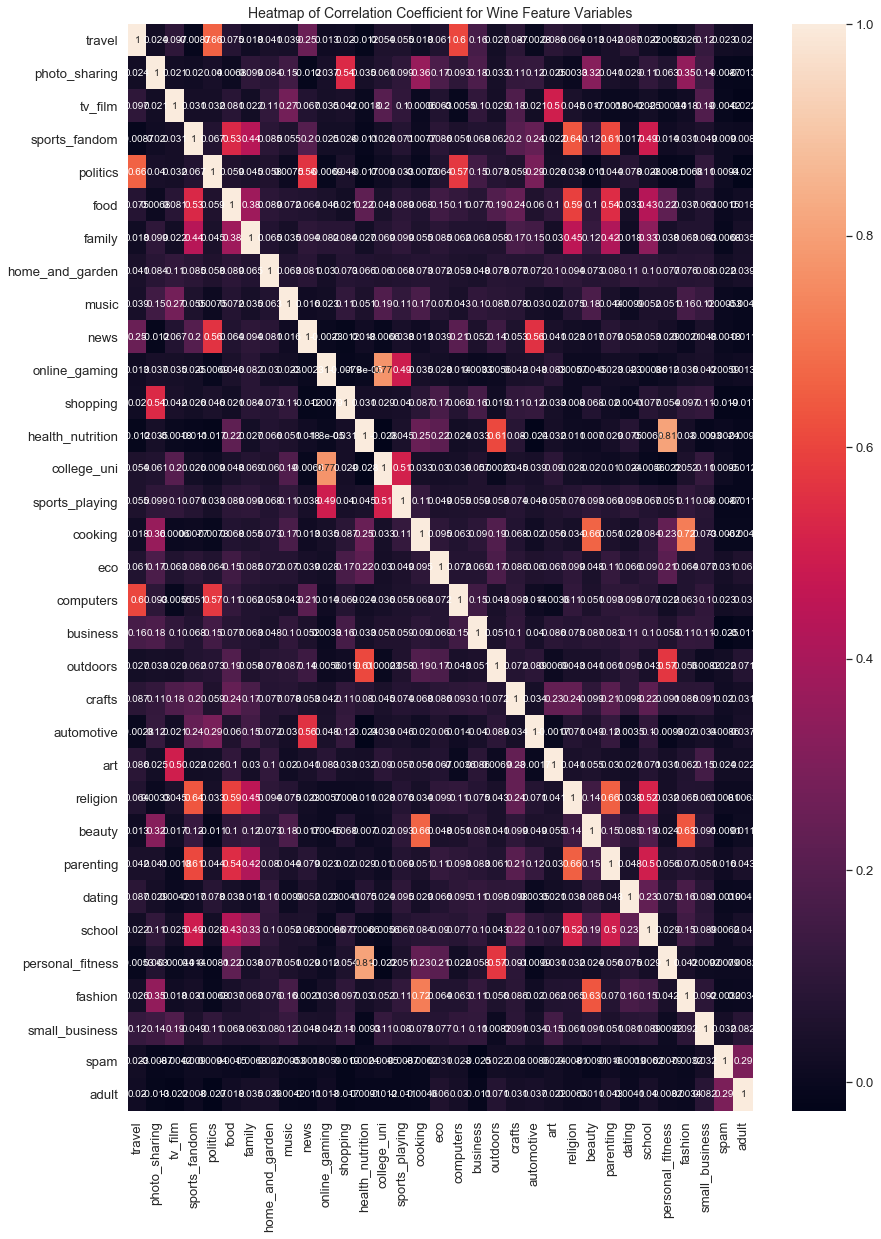

In [153]:
# Create a correlation plot using seaborn
plt.figure(figsize=[14,20])
sns.heatmap(cormat, annot=True)
plt.xticks(rotation=90)
plt.title("Heatmap of Correlation Coefficient for Wine Feature Variables", size=14)

###### Findings :
1.) Shopping & photo-sharing are positively correlated.
2.) College_uni & online_gaming have high positive correlation.
3.) Health_nutrition,personal_fitness and outdoors have a high positive correlation showing these people are health conscious.
4.) Fashion and beauty have a strong postive correlation(0.63)
5.) Business & politics are positively correlated.
6.) Business & travel are positively correlated.

There are more number of such correlations. Let's perform cluster analysis to gain more insights into the profiles.
We can try including all the variables in the cluster analysis as multicorrelation. As it has little effect on the clusters formed.

### Step 2: Normalize the data and perform clustering : k-means clustering

In [95]:
from sklearn.preprocessing import StandardScaler

In [154]:
# Select the columns for standardization (columns 3 to 37)
selected_columns = df.iloc[:, 3:38]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled = scaler.fit_transform(selected_columns)

# Extract the centers (means) and scales (standard deviations) from the scaler
mu = scaler.mean_
sigma = scaler.scale_

# 'mu' contains means for each column, 'sigma' contains standard deviations for each column
print("Means: \n", mu)
print("Standard Deviations: \n", sigma)

Means: 
 [1.58500381 2.69677747 1.07028673 1.59401167 1.78863233 1.39748795
 0.86386704 0.52068003 0.67926922 1.20553159 1.20883025 1.38936818
 2.56724182 1.54947983 0.63917787 1.9982238  0.51230652 0.64907384
 0.42324283 0.78266937 0.51585892 0.82986552 0.72481604 1.09540726
 0.70515098 0.92133976 0.71086019 0.76769855 1.46206547 0.99657447
 0.33633596 0.00647044 0.40332403]
Standard Deviations: 
 [2.28538452 2.73133671 1.6586781  2.16078042 3.0309212  1.77544467
 1.13248997 0.73664453 1.02994942 2.10064691 2.68729437 1.80873115
 4.49585873 2.89697063 0.97545504 3.42972319 0.76967604 1.17937846
 0.69233505 1.2094062  0.81679572 1.36606429 1.6294722  1.91470802
 1.32781855 1.5152624  1.78223387 1.18818381 2.40509159 1.82829642
 0.61810761 0.083283   1.81331289]


###### Picking the right number of clusters : Elbow Plot

Text(0, 0.5, 'Sum of distances of points to closest cluster centers')

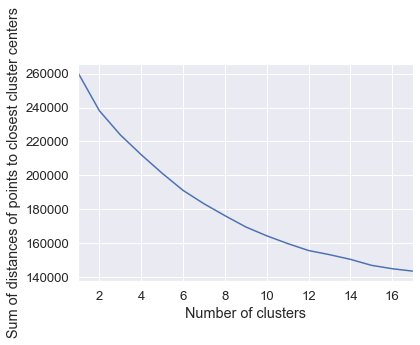

In [97]:
from sklearn.cluster import KMeans

sum_of_distances = {}
for num_clusters in range(1,18):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(df_scaled)
    sum_of_distances[num_clusters] = kmeans.inertia_
Series(sum_of_distances).sort_index().plot()
xlabel('Number of clusters')
ylabel('Sum of distances of points to closest cluster centers')

In [98]:
#Try for different clusters to get the proper segmentation : run K-Means and find the centroids

#No. of clusters = 6

model6 = KMeans(n_clusters=6, random_state=1)
model6.fit(df_scaled)
#print(model.cluster_centers_)
model6.labels_[:5]

array([2, 1, 1, 1, 1])

In [99]:
model6.inertia_

191127.8423639216

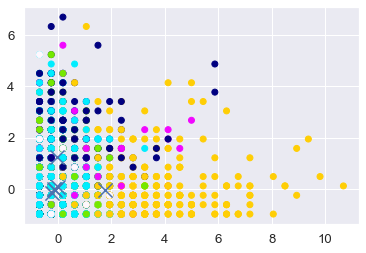

In [100]:
#Plot : No. of clusters = 6
scatter(df_scaled[:,0], df_scaled[:,1], c=model6.labels_, cmap='gist_ncar')
scatter(model6.cluster_centers_[:,0], model6.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

In [101]:
#No. of clusters = 10

model10 = KMeans(n_clusters=10, random_state=1)
model10.fit(df_scaled)
#print(model.cluster_centers_)
model10.labels_[:5]

array([4, 1, 0, 1, 1])

In [102]:
model10.inertia_

164309.2258701042

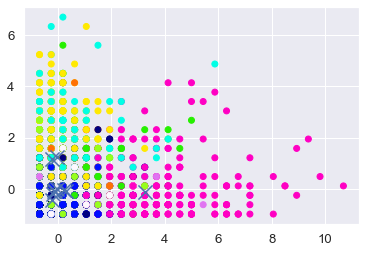

In [103]:
#Plot : No. of clusters = 10
scatter(df_scaled[:,0], df_scaled[:,1], c=model10.labels_, cmap='gist_ncar')
scatter(model10.cluster_centers_[:,0], model10.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

###### Incase of too few number of clusters then we end up with merging few clusters.

In [113]:
#No. of clusters = 5

model = KMeans(n_clusters=5, random_state=1)
model.fit(df_scaled)
#print(model.cluster_centers_)
model.labels_[:5]

array([0, 2, 2, 2, 2])

In [114]:
model.inertia_

201249.91511340023

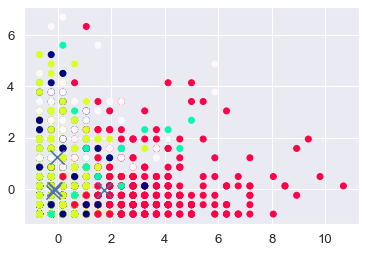

In [115]:
#Plot : No. of clusters = 5
scatter(df_scaled[:,0], df_scaled[:,1], c=model.labels_, cmap='gist_ncar')
scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="x", s=200, linewidths=5)

###### go with 6 clusters as it is better to have more segments in market segmentation than to merge multiple profiles under one segment

### Step 3: Profile the clusters after k-means clustering considering number of clusters = 6

In [116]:
df['Cluster'] = model.labels_

In [117]:
df['Cluster'].value_counts()

2    4838
0     930
1     790
3     721
4     603
Name: Cluster, dtype: int64

In [118]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for cluster quality evaluation
silhouette_avg = silhouette_score(df_scaled, model6.labels_)
print(f"Average silhouette score: {silhouette_avg:.2f}")

Average silhouette score: 0.17


In [119]:
# Calculate silhouette score for cluster quality evaluation
silhouette_avg = silhouette_score(df_scaled, model10.labels_)
print(f"Average silhouette score: {silhouette_avg:.2f}")

Average silhouette score: 0.13


In [121]:
# Calculate silhouette score for cluster quality evaluation
silhouette_avg = silhouette_score(df_scaled, model.labels_)
print(f"Average silhouette score: {silhouette_avg:.2f}")

Average silhouette score: 0.17


In [122]:
interests = df.columns[1:]
segment_characteristics = df.groupby('Cluster')[interests].mean()
print(segment_characteristics)

          chatter  current_events    travel  photo_sharing   tv_film  \
Cluster                                                                
0        4.416129        1.540860  1.243011       2.693548  1.023656   
1        4.256962        1.664557  1.359494       2.622785  1.113924   
2        4.336709        1.458041  1.110169       2.317693  1.041959   
3        4.509015        1.631068  5.529820       2.513176  1.210818   
4        4.923715        1.744610  1.500829       6.059701  1.144279   

         sports_fandom  politics      food    family  home_and_garden  ...  \
Cluster                                                                ...   
0             1.153763  1.238710  2.126882  0.793548         0.643011  ...   
1             5.859494  1.170886  4.525316  2.479747         0.662025  ...   
2             0.978917  1.000207  0.780281  0.598181         0.446879  ...   
3             1.983356  8.796117  1.432732  0.922330         0.613037  ...   
4             1.154229  1.3

## Hierarchical clustering

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_cluster_labels = hierarchical.fit_predict(df_scaled)
hierarchical_cluster_labels

array([0, 3, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
df['Hierarchical_Cluster'] = hierarchical_cluster_labels

In [125]:
silhouette_avg_hierarchical = silhouette_score(df_scaled, hierarchical_cluster_labels)
silhouette_avg_hierarchical

0.1278995699529299

In [126]:
# Compare the number of users in each cluster for both methods
hierarchical_cluster_sizes = df['Hierarchical_Cluster'].value_counts()
hierarchical_cluster_sizes

0    5208
1    1019
3     879
2     390
4     386
Name: Hierarchical_Cluster, dtype: int64

In [127]:
df['Cluster'].value_counts()

2    4838
0     930
1     790
3     721
4     603
Name: Cluster, dtype: int64

In [ ]:
#Highly educated adults - (Cluster 1) : These people showed an interest in travelling, politics, news and dating through their tweets.

#In door entertainment enthusiasts - (Cluster 2): These people showed their interest in indoor entertainment like tv, art, film,computer games and online gaming

#Family people - (Cluster 3): People in this cluster showed an interest in family,parenting, home-garden, school etc through their tweets

#Fitness enthusiasts - (Cluster 4): This is an interesting segement for the nutrition company as these are the people who are interested in staying fit through outdoor activites,health-nutrition and personal-fitness exercises

#Social media people - (Cluster 5): These are the people who showed most interest in photo-sharing and are interested in cooking, beauty ,current-events and fashion